In [21]:
import pandas as pd
import numpy as np
import matplotlib
from glob import glob
import os
from matplotlib import pyplot as plt

In [20]:
df = pd.read_csv('~/my_PENTrack/out/BFCut.out', sep=' ')
df.head()

x  y      z            Bx         dBxdx         dBxdy         dBxdz   By  \
0 -0.3  0  0.000  8.466130e-14  2.192480e-11 -5.206960e-20 -1.224400e-10  0.0   
1 -0.3  0  0.003 -2.826580e-13  2.331270e-11 -9.229010e-20 -1.224400e-10  0.0   
2 -0.3  0  0.006 -6.499790e-13  2.360040e-11 -2.196990e-20 -1.224400e-10  0.0   
3 -0.3  0  0.009 -1.017300e-12  2.333550e-11  7.716490e-20 -1.224400e-10  0.0   
4 -0.3  0  0.012 -1.384620e-12  2.366690e-11  2.358450e-20 -1.224390e-10  0.0   

          dBydx         dBydy  dBydz        Bz         dBzdx         dBzdy  \
0  1.073080e-34  1.573100e-21    0.0  0.000001  1.417220e-10  2.915480e-20   
1  9.283080e-19  2.120800e-20    0.0  0.000001  1.384280e-10  5.512770e-20   
2 -8.664210e-19  3.766550e-21    0.0  0.000001  1.361470e-10  5.876230e-20   
3 -1.609070e-18 -2.700250e-20    0.0  0.000001  1.346180e-10  4.058850e-20   
4  5.755510e-18 -1.737150e-20    0.0  0.000001  1.331950e-10  5.182900e-21   

          dBzdz  Ex  Ey  Ez  V  
0  6.871410e-12   0   0   0  0  
1  7.022180e-12   0   0   0  0  
2  7.142790e-12   0   0   0  0  
3  6.841260e-12   0   0   0  0  
4  6.600040e-12   0   0   0  0

In [22]:
df['Bmag'] = np.sqrt(df['Bx']**2+df['By']**2+df['Bz']**2)

1.00095e-06 3.51452e-05


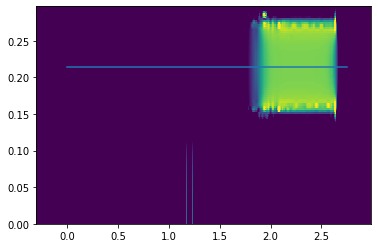

In [59]:
c_min = df[( abs(df['x']<0.25) ) & ( df['z']==0 )]['Bz'].min()
c_max = df[(df['x']>1.8) & (abs(df['z']-.235)<.03)]['Bz'].max()
print(c_min, c_max)
x = np.reshape(df['x'].values, (300,100))
y = np.reshape(df['z'].values, (300,100))
color = np.reshape(df['Bz'].values, (300,100))

trans_pos = .0254*16.9/2
plt.pcolormesh(x,y,color, vmin=c_min*10, vmax=c_max)
plt.plot([0,2.75],[trans_pos, trans_pos])

In [26]:
help(plt.pcolormesh)

Help on function pcolormesh in module matplotlib.pyplot:

pcolormesh(*args, alpha=None, norm=None, cmap=None, vmin=None, vmax=None, shading='flat', antialiased=False, data=None, **kwargs)
    Create a pseudocolor plot with a non-regular rectangular grid.
    
    Call signature::
    
        pcolor([X, Y,] C, **kwargs)
    
    *X* and *Y* can be used to specify the corners of the quadrilaterals.
    
    .. note::
    
       ``pcolormesh()`` is similar to :func:`~Axes.pcolor`. It's much
       faster and preferred in most cases. For a detailed discussion on
       the differences see
       :ref:`Differences between pcolor() and pcolormesh()
       <differences-pcolor-pcolormesh>`.
    
    Parameters
    ----------
    C : array_like
        A scalar 2-D array. The values will be color-mapped.
    
    X, Y : array_like, optional
        The coordinates of the quadrilateral corners. The quadrilateral
        for ``C[i,j]`` has corners at::
    
            (X[i+1, j], Y[i+1, j])   